# PCA mit SVM

Eine SVM auf den original Daten zu trainieren dauert wegen des Lern-Algorithmus der SVM lange.
Daher trainieren wir eine SVM nur auf der reduzierten Anzahl Features analog zur PCA mit Logistic Regression.

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

import pickle

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import numpy as np

import pandas as pd

from sklearn.svm import SVC

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [2]:
def plot_confusion_matrix(y_true: any, y_pred: any):
    labels = np.unique(y_true)
    fig = plt.figure(figsize=(len(labels), len(labels)))
    ConfusionMatrixDisplay(
      confusion_matrix=confusion_matrix(y_true=y_true, y_pred=y_pred, labels=labels, normalize='all'),
      display_labels=labels
    ).plot(ax=fig.gca(), cmap="BuPu", xticks_rotation='vertical', include_values=True)
    plt.show()

# Prepare data

In [3]:
# Load the data and split into features and labels
with open('../../data/train.pkl', 'rb') as f:
    data_train = pickle.load(f)
X_data = data_train["images"]
y_data = data_train["labels"]

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, random_state=42)

## PCA mit SVM

Wir reduzieren die 3072 Features (`32 * 32 * 3` Pixel) zuerst mittels `PCA` auf 200 Features und trainieren anschliessend auf diesen 200 Features eine `SVM`.

In [5]:
%%time

pca_svm = Pipeline([
    ('std', StandardScaler()),
    ('pca', PCA(n_components=200)),
    ('clf', SVC())
])

pca_svm.fit(X_train.reshape(-1, 32 * 32 * 3), y_train)

y_train_hat = pca_svm.predict(X_train.reshape(-1, 32 * 32 * 3))
print("Train: ", accuracy_score(y_train_hat, y_train))

y_val_hat = pca_svm.predict(X_val.reshape(-1, 32 * 32 * 3))
print("Val:   ", accuracy_score(y_val_hat, y_val))

Train:  0.6848266666666667
Val:    0.53288
CPU times: user 12min 16s, sys: 13.5 s, total: 12min 30s
Wall time: 11min 37s


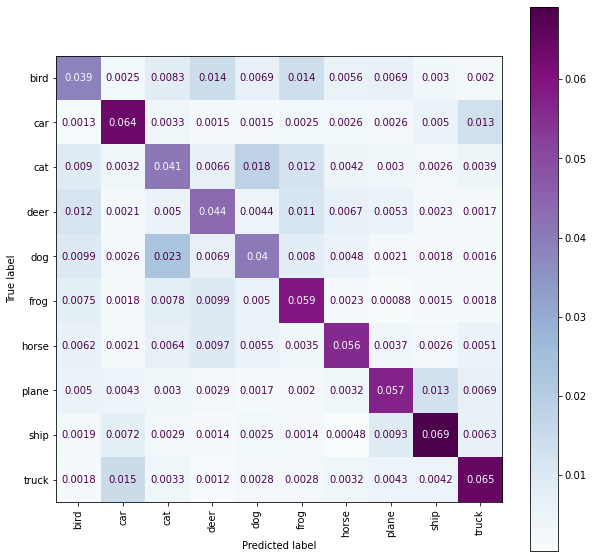

In [6]:
plot_confusion_matrix(y_true=y_val, y_pred=y_val_hat)

# Predict classes for test set

If we are happy with the performance of our model on the validation set, we can apply it to the test set.

In [7]:
with open('../../data/test.pkl', 'rb') as f:
    X_test = pickle.load(f)

In [8]:
y_test_pred = pca_svm.predict(X_test.reshape(-1, 32 * 32 * 3))
y_test_pred_df = pd.DataFrame(y_test_pred, columns=['label'])

To submit the predictions to Kaggle we write them into a .csv file, which you can manually submit.

In [9]:
y_test_pred_df.to_csv('../../out/pca_with_svm_linear.csv', header=True, index_label='id')